# Gallery

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from stardewkg.utils.neo4j_utils import get_neo4j_driver


driver = get_neo4j_driver()


Most loved items and less expensive to give

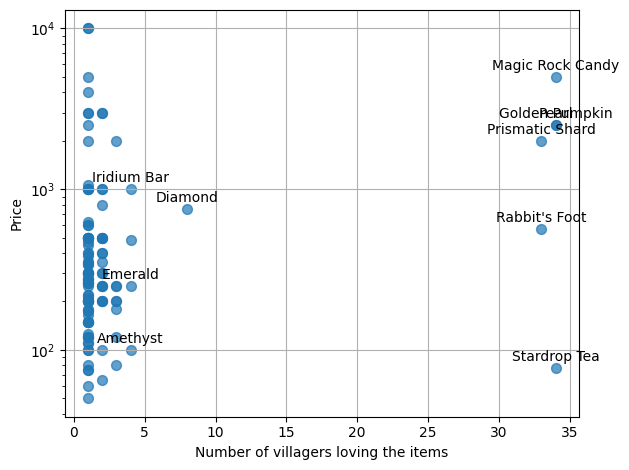

In [ ]:
CYTHER_QUERY = """
MATCH (n:Villager)-[r:LOVES]->(m)
WITH m, COUNT(r) AS degree
ORDER BY degree DESC
RETURN m.name AS item_name, degree, m.sellprice AS price
"""

# 3) Run the query and collect results into Python lists
item_names = []
degrees = []
prices = []

with driver.session() as session:
    result = session.run(CYTHER_QUERY)
    for record in result:
        try:
            float(record["price"])
        except:
            continue
        item_names.append(record["item_name"])
        degrees.append(record["degree"])
        prices.append(record["price"])


degrees_np = np.array(degrees, dtype=float)
prices_np = np.array(prices, dtype=float)


# 5) Plot degree vs. price
# plt.figure(figsize=(8, 5))
plt.scatter(degrees_np, prices_np, s=50, alpha=0.7)

plt.xlabel("Number of villagers loving the item")
plt.ylabel("Price")
plt.yscale("log")

# Optionally annotate a few points (e.g., top‐3 by degree)
for i in range(10):
    plt.annotate(
        item_names[i],
        (degrees_np[i], prices_np[i]),
        textcoords="offset points",
        xytext=(0, 5),
        ha="center",
    )

plt.tight_layout()
plt.grid()
plt.show()


Most liked items and less expensive to give

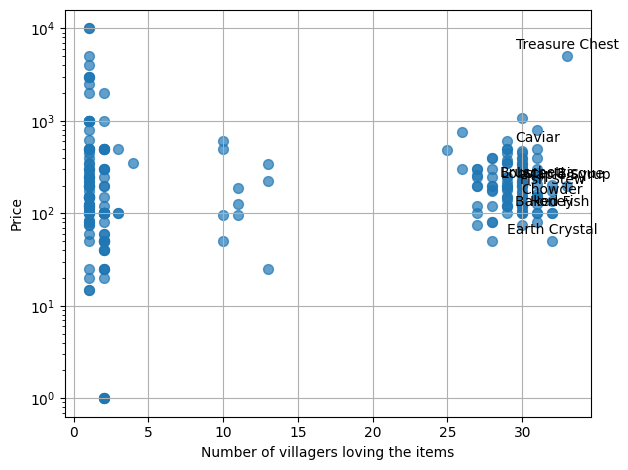

In [ ]:
CYTHER_QUERY = """
MATCH (n:Villager)-[r:LIKES]->(m)
WITH m, COUNT(r) AS degree
ORDER BY degree DESC
RETURN m.name AS item_name, degree, m.sellprice AS price
"""

# 3) Run the query and collect results into Python lists
item_names = []
degrees = []
prices = []

with driver.session() as session:
    result = session.run(CYTHER_QUERY)
    for record in result:
        try:
            float(record["price"])
        except:
            continue
        item_names.append(record["item_name"])
        degrees.append(record["degree"])
        prices.append(record["price"])


degrees_np = np.array(degrees, dtype=float)
prices_np = np.array(prices, dtype=float)


plt.scatter(degrees_np, prices_np, s=50, alpha=0.7)

plt.xlabel("Number of villagers liking the item")
plt.ylabel("Price")
plt.yscale("log")

for i in range(10):
    plt.annotate(
        item_names[i],
        (degrees_np[i], prices_np[i]),
        textcoords="offset points",
        xytext=(0, 5),
        ha="center",
    )

plt.tight_layout()
plt.grid(True)
plt.show()


How to buff luck

```cypher
MATCH path = (m:Buff {name: "Luck"})-[*2]-(y)
WHERE ALL(rel IN relationships(path)
          WHERE NOT type(rel) IN [
            'HATES','DISLIKES','LIKES',
            'LOVES','NEUTRAL','PART_OF'
          ])
RETURN path;
```

![luck](data/images/luck.png)

Fishes location

```cypher
MATCH (n:Fish) -[r:LIVES_IN]- (m:Location) return n, r, m
```

![fished_location](data/images/fish_locations.png)

Category structure of the wiki

```cypher
MATCH (n:Category) -[r:PART_OF]- (m:Category) return n, r, m
```

![categories](data/images/categories.png)